# Human Activity Recognition with Smart Phones

### Importing the packages

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

### Overview of the dataset

In [2]:
df_train = pd.read_csv('har_train.csv')

In [3]:
#printing top-10 rows
df_train.head(10)

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   
5           0.277199          -0.010098          -0.105137         -0.997335   
6           0.279454          -0.019641          -0.110022         -0.996921   
7           0.277432          -0.030488          -0.125360         -0.996559   
8           0.277293          -0.021751          -0.120751         -0.997328   
9           0.280586          -0.009960          -0.106065         -0.994803   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   
5         -0.990487         -0.995420         -0.997627         -0.990218   
6         -0.967186         -0.983118         -0.997003         -0.966097   
7         -0.966728         -0.981585         -0.996485         -0.966313   
8         -0.961245         -0.983672         -0.997596         -0.957236   
9         -0.972758         -0.986244         -0.995405         -0.973663   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.923527         -0.934724  ...                        -0.710304   
1         -0.957686         -0.943068  ...                        -0.861499   
2         -0.977469         -0.938692  ...                        -0.760104   
3         -0.989302         -0.938692  ...                        -0.482845   
4         -0.990441         -0.942469  ...                        -0.699205   
5         -0.995549         -0.942469  ...                        -0.844619   
6         -0.983116         -0.940987  ...                        -0.564430   
7         -0.982982         -0.940987  ...                        -0.421715   
8         -0.984379         -0.940598  ...                        -0.572995   
9         -0.985642         -0.940028  ...                         0.140452   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   
2                    -0.118559                              0.177899   
3                    -0.036788                             -0.012892   
4                     0.123320                              0.122542   
5                     0.082632                             -0.143439   
6                    -0.212754                             -0.230622   
7                    -0.020888                              0.593996   
8                     0.012954                              0.080936   
9                    -0.020590                             -0.127730   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   
2                          0.100699                              0.808529   
3                          0.640011                             -0.485366   
4                          0.693578                             -0.615971   
5                          0.275041                             -0.368224   
6                          0.014637                             -0.18951

In [4]:
df_test = pd.read_csv("har_test.csv")

In [5]:
#print top-10 rows
df_test.head(10)

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   
5           0.279220          -0.018620          -0.113902         -0.994455   
6           0.279746          -0.018271          -0.104000         -0.995819   
7           0.274601          -0.025035          -0.116831         -0.995594   
8           0.272529          -0.020954          -0.114472         -0.996784   
9           0.275746          -0.010372          -0.099776         -0.998373   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   
5         -0.970417         -0.965316         -0.994585         -0.969481   
6         -0.976354         -0.977725         -0.995996         -0.973665   
7         -0.982069         -0.985262         -0.995341         -0.981485   
8         -0.975906         -0.986597         -0.997029         -0.973735   
9         -0.986933         -0.991022         -0.998663         -0.987140   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.674302         -0.894088  ...                        -0.705974   
1         -0.945823         -0.894088  ...                        -0.594944   
2         -0.963483         -0.939260  ...                        -0.640736   
3         -0.968897         -0.938610  ...                        -0.736124   
4         -0.977346         -0.938610  ...                        -0.846595   
5         -0.965897         -0.937856  ...                        -0.857565   
6         -0.979253         -0.937856  ...                        -0.391286   
7         -0.984610         -0.941263  ...                        -0.672358   
8         -0.985556         -0.941263  ...                        -0.853248   
9         -0.991084         -0.943761  ...                        -0.741435   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                     0.006462                              0.162920   
1                    -0.083495                              0.017500   
2                    -0.034956                              0.202302   
3                    -0.017067                              0.154438   
4                    -0.002223                             -0.040046   
5                    -0.095681                              0.048849   
6                    -0.309083                             -0.000857   
7                    -0.025526                             -0.214033   
8                     0.144626                             -0.035564   
9                     0.157584                             -0.033487   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.825886                              0.271151   
1                         -0.434375                              0.920593   
2                          0.064103                              0.145068   
3                          0.340134                              0.296407   
4                          0.736715                             -0.118545   
5                          0.760684                             -0.072216   
6                          0.728514                             -0.33377

In [6]:
#print the size of the dataset
print("Size of train dataset ==>",df_train.size)
print("Size of test dataset ==>",df_test.size)

Size of train dataset ==> 4139176
Size of test dataset ==> 1659161


In [7]:
#print the shape of the dataset
print("Shape of train dataset ==>",df_train.shape)
print("Shape of test dataset ==>",df_test.shape)

Shape of train dataset ==> (7352, 563)
Shape of test dataset ==> (2947, 563)


### Checking the database for null values

In [8]:
null = df_train.isnull().values.sum()
print("Null Values: ",null)
df_train.dtypes

Null Values:  0


tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object

### Checking the dataset for duplicates

In [9]:
print('Number of duplicates in train set:{}'.format(sum(df_train.duplicated())))
print('Number of duplicates in test set:{}'.format(sum(df_test.duplicated())))
print('Duplicated data',df_train.duplicated().values.sum())
print('Duplicated data',df_test.duplicated().values.sum())

Number of duplicates in train set:0
Number of duplicates in test set:0
Duplicated data 0
Duplicated data 0


In [10]:
df_train['subject'].groupby(df_train['subject']).count()

subject
1     347
3     341
5     302
6     325
7     308
8     281
11    316
14    323
15    328
16    366
17    368
19    360
21    408
22    321
23    372
25    409
26    392
27    376
28    382
29    344
30    383
Name: subject, dtype: int64

 Database has 30 subjects and each of them have performed the task several times.

In [11]:
df_train['subject'].groupby(df_train['Activity']).value_counts()

Activity          subject
LAYING            21         90
                  19         83
                  28         80
                  26         76
                  27         74
                             ..
WALKING_UPSTAIRS  5          47
                  21         47
                  22         42
                  8          41
                  19         40
Name: subject, Length: 126, dtype: int64

So we have 30 subjects and each perfomed different trials. Now lets look at how many trials of each **Activity** exist in our train dataset:

In [12]:
# .size() and .count() provide the same answer
df_train['Activity'].groupby(df_train['Activity']).size()

Activity
LAYING                1407
SITTING               1286
STANDING              1374
WALKING               1226
WALKING_DOWNSTAIRS     986
WALKING_UPSTAIRS      1073
Name: Activity, dtype: int64

In [13]:
#unique values of subject
df_train['subject'].unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30], dtype=int64)

### **Problem framwork**

* We have 30 subjects.
* In database each datapoint is one of the six activities.
* Each subject repeated the activity several times

Now given the dataset, can we predict the activity based on the featureset?

In [14]:
import plotly.express as px
px.pie(df_train,names='Activity',title='Activity in database')

So pie plot shows that the data is balanced.

In [15]:
px.histogram(data_frame=df_train,x='subject',color='Activity',barmode='group',title='Histogram of data in train set')

In [16]:
px.histogram(data_frame=df_test,x='subject',color='Activity',barmode='group',title='Histogram of data in test set')

As we can see we got almost same number of readings from all the subjects.

In [17]:
px.histogram(df_train,x='Activity',color='Activity',title='Number of recordings per activity')

## Data Exploration

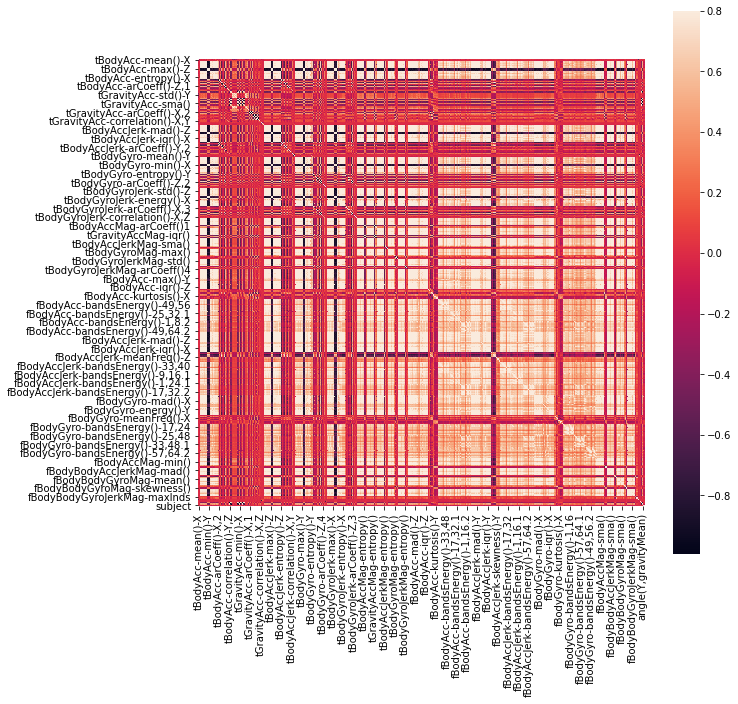

In [18]:
corrmat=df_train.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

The dataset has lost of feaures that are highly correlated with each other. Should we drop the features that are highly correlated?

##### Histogram of mean magnitude of acceleration shows that dynamic activities are differnet from static activities

In [19]:
px.histogram(df_train,x='tBodyAccMag-mean()',color='Activity')
#sns.displot(df_train,x='tBodyAccMag-mean()',hue='Activity')

In [20]:
px.box(df_train, x='Activity',y='tBodyAccMag-mean()')

In [21]:
#print the columns of the dataset
df_train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

## Extract X and Y 

In [22]:
X = pd.DataFrame(df_train.drop(['Activity','subject'], axis=1))
Y = df_train.Activity.values.astype(object)

## Data Preprocessing

In [23]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [24]:
encoder.fit(Y)
y = encoder.transform(Y)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
X = scaler.fit_transform(X)

In [27]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [28]:
clf = DecisionTreeClassifier() 
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(f'Accuracy (DecisionTreeClassifier): {accuracy_score(y_test, y_pred)}')

Accuracy (DecisionTreeClassifier): 0.946974847042828


In [29]:
# import SVC classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# import metrics to compute accuracy (Evulate)
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [37]:
rand_clf=RandomForestClassifier(random_state=5)
rand_clf.fit(X_train,y_train)
y_hat = rand_clf.predict(X_test)
print('Accuracy score(test data): \n',accuracy_score(y_test,y_hat))
print('\n')
print('Classification report(test dataset): \n',classification_report(y_test,y_hat))

Accuracy score(test data): 
 0.9796057104010877


Classification report(test dataset): 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       0.95      0.96      0.96       277
           2       0.97      0.95      0.96       293
           3       1.00      0.98      0.99       251
           4       0.98      1.00      0.99       186
           5       0.99      1.00      0.99       215

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471



In [31]:
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
from sklearn.metrics import classification_report,accuracy_score
y_hat=lr_clf.predict(X_test)
print('Accuracy score(test data): \n',accuracy_score(y_test,y_hat))
print('\n')
print('Classification report(test dataset): \n',classification_report(y_test,y_hat))

Accuracy score(test data): 
 0.9870836165873556


Classification report(test dataset): 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       0.96      0.97      0.97       277
           2       0.98      0.97      0.97       293
           3       1.00      1.00      1.00       251
           4       0.99      1.00      1.00       186
           5       1.00      1.00      1.00       215

    accuracy                           0.99      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.99      0.99      0.99      1471



In [41]:
#Run SVM with default hyperparameters
from sklearn import svm
#SVM kernel: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
svm_clf=svm.SVC()
svm_clf.fit(X_train,y_train)
y_hat=svm_clf.predict(X_test)
print('SVM accuracy score (test data):\n',accuracy_score(y_test,y_hat))
print('\n')
print('SVM classification report (test data): \n',classification_report(y_test,y_hat))

SVM accuracy score (test data):
 0.9802855200543847


SVM classification report (test data): 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       0.95      0.96      0.95       277
           2       0.96      0.95      0.96       293
           3       1.00      1.00      1.00       251
           4       1.00      1.00      1.00       186
           5       1.00      1.00      1.00       215

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471



In [42]:
#Some Hyperparameter where kernel use rbf and C=100.0
svc2=SVC(kernel='rbf',C=100.0)
svc2.fit(X_train,y_train)
y_pred2 = svc2.predict(X_test)
print('Accuracy score(test data): \n',accuracy_score(y_test,y_pred2))
print('\n')
print('Classification report(test dataset): \n',classification_report(y_test,y_pred2))

Accuracy score(test data): 
 0.9918422841604351


Classification report(test dataset): 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       0.97      0.99      0.98       277
           2       0.99      0.97      0.98       293
           3       1.00      1.00      1.00       251
           4       1.00      1.00      1.00       186
           5       1.00      1.00      1.00       215

    accuracy                           0.99      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.99      0.99      0.99      1471



In [43]:
"""The best model is SupportVectorMachine to find best accuracy"""

'The best model is SupportVectorMachine to find best accuracy'